In [1]:
import sys

In [2]:
sys.path.append('..')

In [3]:
from nbhd import data

Initializing database connection...
Database connected!


In [4]:
db = data.Base()

In [6]:
db._spatial_query??

Signature: db._spatial_query(table, st_query, polygon, crs=27700)
Docstring: <no docstring>
Source:   
    def _spatial_query(self, table, st_query, polygon, crs=27700):
        sql = f'''
             SELECT * from {table}
                WHERE ST_{st_query.capitalize()}(
                    geometry,
                    ST_GeomFromText('{polygon}', {crs})
                    )
        '''
        return sql
File:      ~/code/nbhd/data.py
Type:      method


In [7]:
pixels = db.select('pixels')

<AxesSubplot:>

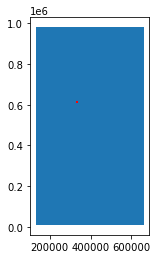

In [8]:
ax = pixels.plot()
pixels.iloc[2000:2001].plot(color='red', ax=ax)

In [9]:
p = pixels.iloc[2000]

In [11]:
buildings = db.within('openmaplocal', p.geometry)

In [17]:
buildings

,id,featureCode,geometry
0,id6DE2A009-E6A0-4356-A2B3-EDFCDA576C3A,15014,"POLYGON ((336693.490 616190.560, 336710.910 61..."
1,idF74CFAE3-3FD6-4E0F-ABD1-52D089D00EBD,15014,"POLYGON ((336838.440 619508.620, 336830.920 61..."
2,id93E7C9AD-9CFF-4659-A958-6BBA9D0CA4C8,15014,"POLYGON ((338259.950 618277.500, 338265.500 61..."
3,id71837B7B-CE73-47B7-A8B1-761C0BB4C483,15014,"POLYGON ((338289.500 618297.500, 338299.050 61..."
4,id4835D4C9-77A2-4D37-9A9A-B1632BD0F760,15014,"POLYGON ((333634.000 614709.500, 333630.500 61..."
...,...,...,...
120,idF53276B0-778A-4F0C-B789-D1B910508D33,15014,"POLYGON ((330656.070 618350.730, 330645.220 61..."
121,id34528656-1807-4207-B6C9-DF462595AEB9,15014,"POLYGON ((330636.310 618382.530, 330640.400 61..."
122,id4AFBD40D-3C0F-48AD-A35A-EEEFE0142305,15014,"POLYGON ((331507.750 618354.300, 331511.850 61..."
123,idC959C95B-C0E1-4D75-8F2F-E8D5A25040C5,15014,"POLYGON ((330595.740 618410.230, 330578.960 61..."


In [18]:
import matplotlib.pyplot as plt

<AxesSubplot:>

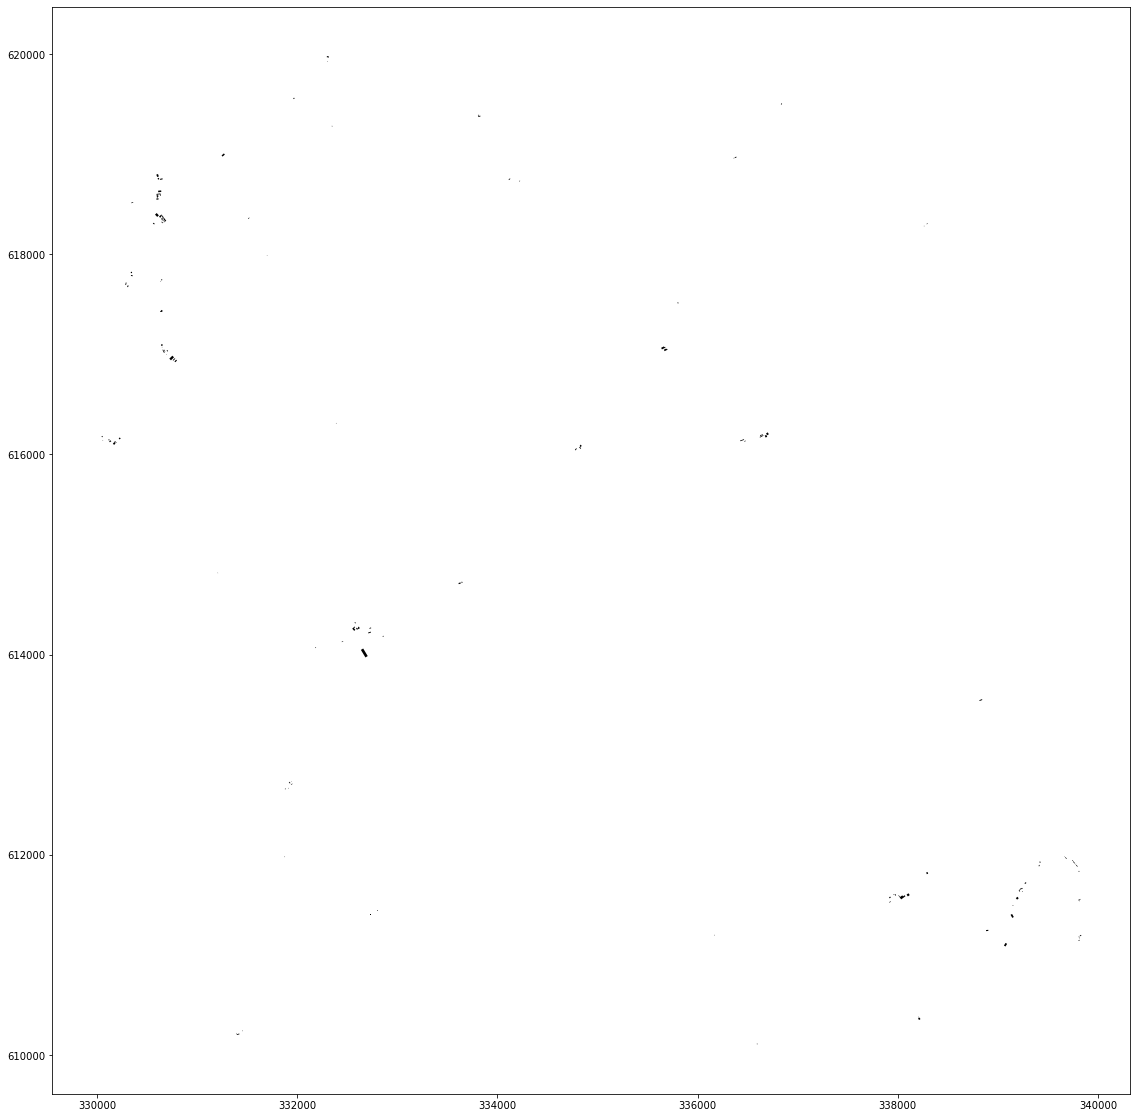

In [19]:
f, ax = plt.subplots(figsize=(20,20))
# ax = pixels.iloc[2000:2001].geometry.boundary.plot()
buildings.plot(color='k', ax=ax)

In [29]:
from shapely.geometry import MultiPolygon

In [32]:
uprn =  db.within('openuprn', MultiPolygon(list(buildings.geometry)).wkt)

In [33]:
uprn

,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
0,116051987,330343.00,617814.00,55.449213,-3.102809,POINT (330343.000 617814.000)
1,116052011,330701.00,617037.00,55.442284,-3.096957,POINT (330701.000 617037.000)
2,116052013,330306.00,617677.00,55.447977,-3.103360,POINT (330306.000 617677.000)
3,116052014,330603.00,618551.00,55.455871,-3.098884,POINT (330603.000 618551.000)
4,116052015,330568.00,618306.00,55.453665,-3.099376,POINT (330568.000 618306.000)
...,...,...,...,...,...,...
60,116089645,336377.06,618966.00,55.460385,-3.007695,POINT (336377.060 618966.000)
61,116090505,332561.40,614258.18,55.417579,-3.066883,POINT (332561.400 614258.180)
62,116093079,330307.12,617676.93,55.447977,-3.103342,POINT (330307.120 617676.930)
63,116095016,330663.40,617030.87,55.442223,-3.097550,POINT (330663.400 617030.870)
